# Clustering-Based Anomaly Detection

This notebook demonstrates how to identify anomalies using clustering-based methods.

## Import necessary libraries

In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import LocalOutlierFactor

from sklearn.datasets import make_blobs

## Define colors and generate dataset

In [2]:
# Set the random seed for reproducibility.
np.random.seed(42)

# Define the colors to be used in the plot.
colors = [
    "#2580B7", # Blue
    "#C03B26", # Red
    "#44546A", # Gray
]

# Create two clusters with different samples.
N_SAMPLES_1 = 100
N_SAMPLES_2 = 150
centers = [[2, 2], [8, 8]]
cluster_std = [1.0, 1.5]

X, y = make_blobs(
    n_samples=[N_SAMPLES_1, N_SAMPLES_2], centers=centers,
    cluster_std=cluster_std, random_state=42
)

# Add some outliers.
N_OUTLIERS = 20
outliers = np.random.uniform(low=-3, high=13, size=(N_OUTLIERS, 2))
X = np.concatenate([X, outliers], axis=0)
y = np.concatenate([y, [-1] * N_OUTLIERS])

## Method 1: Distance to Cluster Centroid (KMeans)

In [3]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
distances = kmeans.transform(X).min(axis=1)
threshold = np.percentile(distances, 95)
outliers_kmeans = distances > threshold

## Method 2: Density-Based Clustering (DBSCAN)

In [4]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)
outliers_dbscan = labels_dbscan == -1

## Method 3: Cluster-Based Local Outliers (LOF)

In [5]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outliers_lof = lof.fit_predict(X) == -1

## Visualization: All Methods

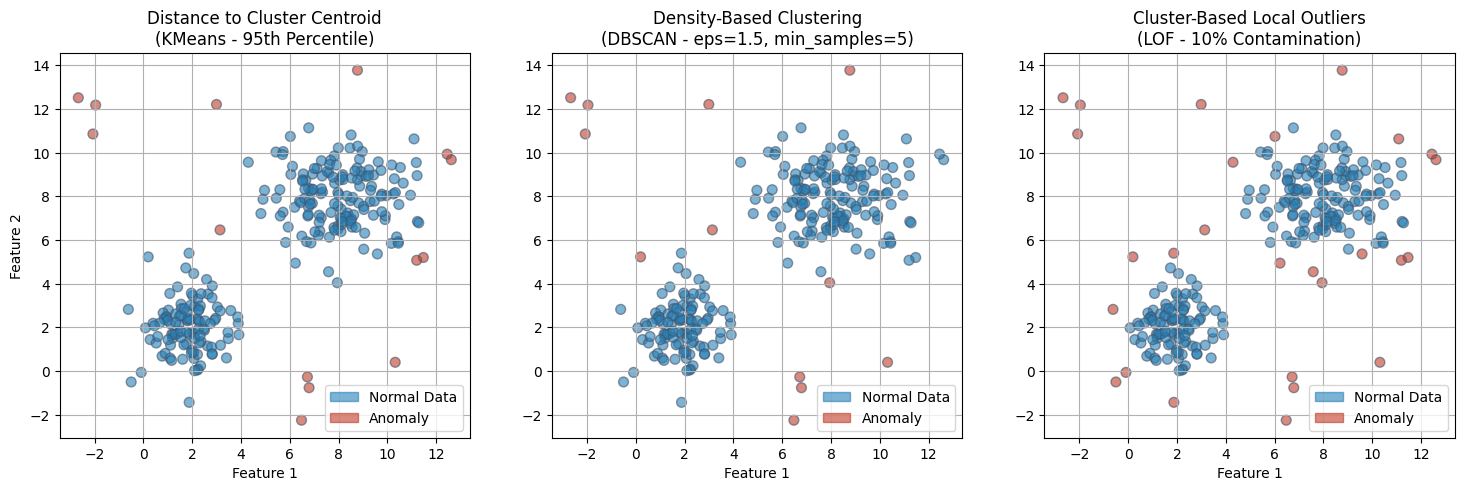

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for Distance to Cluster Centroid.
axes[0].scatter(
    X[:, 0], X[:, 1],
    c=np.where(outliers_kmeans, colors[1], colors[0]),
    s=50, edgecolor=colors[-1], alpha=0.6
)

# Custom legend for clarity.
initial_patch = mpatches.Patch(color=colors[0], alpha=0.6, label="Normal Data")
final_patch = mpatches.Patch(color=colors[1], alpha=0.6, label="Anomaly")
axes[0].legend(
    handles=[initial_patch, final_patch]
)

axes[0].set_title("Distance to Cluster Centroid\n(KMeans - 95th Percentile)")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
axes[0].grid(True)


# Plot for DBSCAN.
axes[1].scatter(
    X[:, 0], X[:, 1],
    c=np.where(outliers_dbscan, colors[1], colors[0]),
    s=50, edgecolor=colors[-1], alpha=0.6
)

# Custom legend for clarity.
initial_patch = mpatches.Patch(color=colors[0], alpha=0.6, label="Normal Data")
final_patch = mpatches.Patch(color=colors[1], alpha=0.6, label="Anomaly")
axes[1].legend(
    handles=[initial_patch, final_patch]
)

axes[1].set_title("Density-Based Clustering\n(DBSCAN - eps=1.5, min_samples=5)")
axes[1].set_xlabel("Feature 1")
axes[1].grid(True)


# Plot for Cluster-Based Local Outliers.
axes[2].scatter(
    X[:, 0], X[:, 1],
    c=np.where(outliers_lof, colors[1], colors[0]),
    s=50, edgecolor=colors[-1], alpha=0.6
)

# Custom legend for clarity.
initial_patch = mpatches.Patch(color=colors[0], alpha=0.6, label="Normal Data")
final_patch = mpatches.Patch(color=colors[1], alpha=0.6, label="Anomaly")
axes[2].legend(
    handles=[initial_patch, final_patch]
)

axes[2].set_title("Cluster-Based Local Outliers\n(LOF - 10% Contamination)")
axes[2].set_xlabel("Feature 1")
axes[2].grid(True)

plt.show()